<a href="https://colab.research.google.com/github/Akshitwadhwa/Stock-modelling/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This is the colab notebook which has some ways in which optimal portfolio can be made. The desgin overview of this portfolio is such that we have selected a combinations of 4 distinct portfolios from the set of 50 stocks

-- In the set of 50 stocks we are going to choose a set of 10 stocks in each portfolio

In [2]:
# Firstly we are going to load all the libraries which we need
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import cvxpy as cp

-- Now we are going to load the set of the nifty fifty stocks

In [3]:
#importing the nifty fifty stocks
nifty50_Stocks = [
    "RELIANCE.NS", "TCS.NS", "INFY.NS", "HDFCBANK.NS", "ICICIBANK.NS", "KOTAKBANK.NS",
    "HINDUNILVR.NS", "SBIN.NS", "LT.NS", "ITC.NS", "AXISBANK.NS", "BAJFINANCE.NS",
    "ASIANPAINT.NS", "MARUTI.NS", "SUNPHARMA.NS", "ULTRACEMCO.NS", "NESTLEIND.NS", "WIPRO.NS",
    "NTPC.NS", "POWERGRID.NS", "COALINDIA.NS", "TITAN.NS", "TECHM.NS", "GRASIM.NS",
    "BHARTIARTL.NS", "HCLTECH.NS", "DRREDDY.NS", "ADANIENT.NS", "BAJAJFINSV.NS", "TATASTEEL.NS",
    "HDFCLIFE.NS", "SBILIFE.NS", "HEROMOTOCO.NS", "DIVISLAB.NS", "INDUSINDBK.NS", "JSWSTEEL.NS",
    "CIPLA.NS", "EICHERMOT.NS", "UPL.NS", "BPCL.NS", "BRITANNIA.NS", "SHREECEM.NS",
    "ONGC.NS", "APOLLOHOSP.NS", "BAJAJ-AUTO.NS", "M&M.NS", "HINDALCO.NS", "TATACONSUM.NS",
    "TATAMOTORS.NS", "SBICARD.NS"
]

# Defining the time for which we need the data for

data_stocks = yf.download(nifty50_Stocks, start="2014-01-01", end="2024-01-01")

print(data_stocks.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  50 of 50 completed

Price            Close                                                        \
Ticker     ADANIENT.NS APOLLOHOSP.NS ASIANPAINT.NS AXISBANK.NS BAJAJ-AUTO.NS   
Date                                                                           
2014-01-01   37.933193    927.892883    459.297424  247.552444   1448.022583   
2014-01-02   36.041828    890.798096    446.246857  243.740112   1434.920166   
2014-01-03   35.053795    911.283997    449.877106  241.556152   1431.521729   
2014-01-06   35.576046    905.300964    450.933990  240.674911   1426.046265   
2014-01-07   34.150455    892.281982    450.290649  236.450714   1427.292236   

Price                                                                         \
Ticker     BAJAJFINSV.NS BAJFINANCE.NS BHARTIARTL.NS    BPCL.NS BRITANNIA.NS   
Date                                                                           
2014-01-01     75.462006    151.039154    286.472534  31.349644   399.551544   
2014-01-02     72.309883    150.933350 

In [4]:
# Now we need to remove the missing data in the stocks
data_stocks = data_stocks.dropna(axis=1, thresh=len(data_stocks)*0.95)
import random

# 2. These stocks are diversified acorss different sectors to ensure no single sector dominates your profile
-- After this we are going to find the sectors of each of the following stocks which is available in the yfinance library

# What is stocks diversification
-- Stock diversification is the porcess of spreading your investments across different assests to reduce the overeall risks

-- What does Diversity do in the stock selection,it reduces the risk of getting a major loss when the market crashes as you dont have all your eggs in one basket

In [5]:
available_stocks = list(data_stocks .columns)
random.shuffle(available_stocks)

In [6]:
portfolios = {
    f"Portfolio_{i+1}": available_stocks[i*10:(i+1)*10]
    for i in range(4)
}

portfolios
# these are the portfolios we have used

{'Portfolio_1': [('Volume', 'TITAN.NS'),
  ('High', 'ICICIBANK.NS'),
  ('Open', 'ADANIENT.NS'),
  ('High', 'BPCL.NS'),
  ('Close', 'SBIN.NS'),
  ('Low', 'BAJAJFINSV.NS'),
  ('Volume', 'EICHERMOT.NS'),
  ('High', 'DIVISLAB.NS'),
  ('High', 'INFY.NS'),
  ('Open', 'KOTAKBANK.NS')],
 'Portfolio_2': [('High', 'BHARTIARTL.NS'),
  ('High', 'M&M.NS'),
  ('Volume', 'JSWSTEEL.NS'),
  ('Volume', 'ITC.NS'),
  ('High', 'MARUTI.NS'),
  ('Open', 'EICHERMOT.NS'),
  ('Low', 'ITC.NS'),
  ('Close', 'TATACONSUM.NS'),
  ('Volume', 'HINDALCO.NS'),
  ('Low', 'TATASTEEL.NS')],
 'Portfolio_3': [('Volume', 'SHREECEM.NS'),
  ('Volume', 'BRITANNIA.NS'),
  ('Close', 'SUNPHARMA.NS'),
  ('High', 'NTPC.NS'),
  ('Close', 'BPCL.NS'),
  ('Low', 'M&M.NS'),
  ('Close', 'DIVISLAB.NS'),
  ('Close', 'ITC.NS'),
  ('Volume', 'SBIN.NS'),
  ('Low', 'POWERGRID.NS')],
 'Portfolio_4': [('High', 'TCS.NS'),
  ('Volume', 'WIPRO.NS'),
  ('Close', 'KOTAKBANK.NS'),
  ('Open', 'BAJFINANCE.NS'),
  ('Volume', 'BAJFINANCE.NS'),
  ('Open', 'T

In [7]:
returns = data_stocks.pct_change().dropna()

In [8]:
# Create a DataFrame to display the selected portfolios
portfolio_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in portfolios.items()]))

print("Selected Stocks in Each Portfolio:\n")
print(portfolio_df)

Selected Stocks in Each Portfolio:

              Portfolio_1             Portfolio_2             Portfolio_3  \
0      (Volume, TITAN.NS)   (High, BHARTIARTL.NS)   (Volume, SHREECEM.NS)   
1    (High, ICICIBANK.NS)          (High, M&M.NS)  (Volume, BRITANNIA.NS)   
2     (Open, ADANIENT.NS)   (Volume, JSWSTEEL.NS)   (Close, SUNPHARMA.NS)   
3         (High, BPCL.NS)        (Volume, ITC.NS)         (High, NTPC.NS)   
4        (Close, SBIN.NS)       (High, MARUTI.NS)        (Close, BPCL.NS)   
5    (Low, BAJAJFINSV.NS)    (Open, EICHERMOT.NS)           (Low, M&M.NS)   
6  (Volume, EICHERMOT.NS)           (Low, ITC.NS)    (Close, DIVISLAB.NS)   
7     (High, DIVISLAB.NS)  (Close, TATACONSUM.NS)         (Close, ITC.NS)   
8         (High, INFY.NS)   (Volume, HINDALCO.NS)       (Volume, SBIN.NS)   
9    (Open, KOTAKBANK.NS)     (Low, TATASTEEL.NS)     (Low, POWERGRID.NS)   

               Portfolio_4  
0           (High, TCS.NS)  
1       (Volume, WIPRO.NS)  
2    (Close, KOTAKBANK.NS)  


In [9]:
portfolio_returns = pd.DataFrame(index=returns.index)
# now we are going to make the dataframe of the returns in the form of a dataframe

In [10]:
for name, stocks in portfolios.items():
    portfolio_returns[name] = returns[stocks].mean(axis=1)

In [11]:
portfolio_returns
# these are the returns of all the portfolios.

,Portfolio_1,Portfolio_2,Portfolio_3,Portfolio_4
Date,,,,
2014-01-02,0.546724,0.768621,1.882453,0.063466
2014-01-03,-0.126419,-0.018717,-0.182786,0.654563
2014-01-06,-0.035370,-0.005751,2.112083,0.062288
2014-01-07,0.113401,0.024071,-0.077075,-0.088115
2014-01-08,0.084179,-0.049292,2.320162,-0.033899
...,...,...,...,...
2023-12-22,-0.027087,0.069632,-0.077278,0.370947
2023-12-26,0.022231,-0.111055,-0.054794,0.032907
2023-12-27,0.016974,0.293723,0.063479,-0.020892


## After we have taken out the returns of the porfolios , we need to take the last 10 years of data
From that we are going to Break the period into non-overlapping 20-day windows

In [12]:
window_results = []

for i in range(0, len(portfolio_returns) - 20 + 1, 20):
    window = portfolio_returns.iloc[i:i+20]

    # after creating a loop we have made

    cumulative = (1 + window).prod() - 1

    daily_mean = window.mean(axis=1)

    # Volatility of the window
    volatility = daily_mean.std()

    # Total return of the market (mean return of all portfolios)
    total_return = (1 + daily_mean).prod() - 1

    # Label as Crash if volatility is high and returns are sharply negative
    label = 'Crash' if (volatility > 0.015 and total_return < -0.03) else 'Normal'

    result = {
        'Start_Date': window.index[0],
        'Portfolio_1': round(cumulative['Portfolio_1'], 4),
        'Portfolio_2': round(cumulative['Portfolio_2'], 4),
        'Portfolio_3': round(cumulative['Portfolio_3'], 4),
        'Portfolio_4': round(cumulative['Portfolio_4'], 4),
        'Volatility': round(volatility, 4),
        'Market_Regime': label
    }

    window_results.append(result)

# Create DataFrame
windows_df = pd.DataFrame(window_results)
print(windows_df.head(10))

#plot graph

  Start_Date  Portfolio_1  Portfolio_2  Portfolio_3  Portfolio_4  Volatility  \
0 2014-01-02       2.2352       1.4407     135.7492       3.1931      0.2456   
1 2014-01-30       4.3221          inf          inf      10.0738         NaN   
2 2014-02-28       3.1448       0.6733      69.2580       4.1317      0.2245   
3 2014-03-31          inf          inf          inf          inf         NaN   
4 2014-05-02       2.2097       1.1221       5.8917       3.1245      0.1329   
5 2014-05-30       4.2155       0.4919       9.8731       2.1365      0.1132   
6 2014-06-27       0.2669       0.5998       5.6644       0.7609      0.0668   
7 2014-07-25       4.3864       0.6567       4.3853       2.8220      0.0746   
8 2014-08-26       1.3149       0.5131       9.0141       1.2498      0.1114   
9 2014-09-24          inf          inf          inf          inf         NaN   

  Market_Regime  
0        Normal  
1        Normal  
2        Normal  
3        Normal  
4        Normal  
5        No

In [13]:
##2.2 what is the importance of daily mean and voltatiltu in the above code

## Why have we chosen the given values of the vol_thresh and return_threshold is that duirng the 20 day overlap period which we have taken , a drop of 3% or more is considered in the negative direction.
-- Since we want to capture the crahses as well as the times where the stocks where in the right direction to say , profit


In [15]:
# Now if we want to see some times where the combinaitons of these portfolios had experienced some crashes , we can find the sharp threshold range
sharp_drop_threshold = -0.05

sharp_drop_windows = windows_df[
    (windows_df['Portfolio_1'] < sharp_drop_threshold) |
    (windows_df['Portfolio_2'] < sharp_drop_threshold) |
    (windows_df['Portfolio_3'] < sharp_drop_threshold) |
    (windows_df['Portfolio_4'] < sharp_drop_threshold)
]
print(sharp_drop_windows[['Start_Date', 'Portfolio_1', 'Portfolio_2', 'Portfolio_3', 'Portfolio_4', 'Market_Regime']])




Empty DataFrame
Columns: [Start_Date, Portfolio_1, Portfolio_2, Portfolio_3, Portfolio_4, Market_Regime]
Index: []


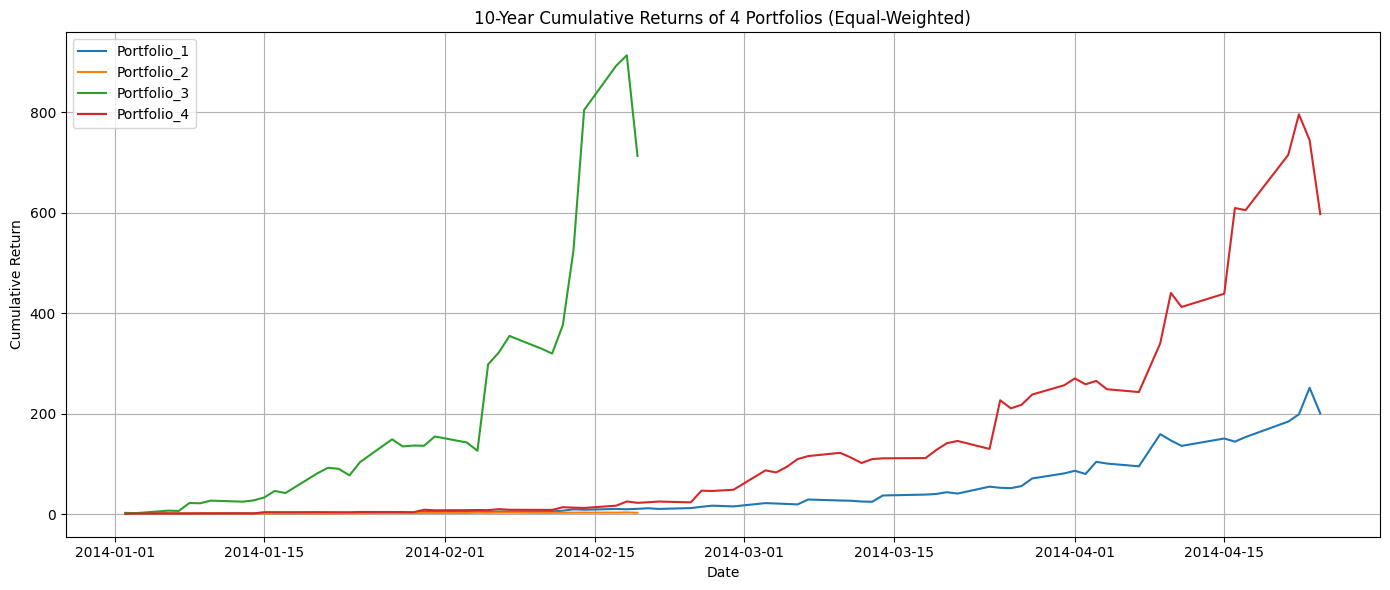

In [20]:
import matplotlib.pyplot as plt

returns_df = data_stocks.pct_change().dropna()
# this will help us getting the daily returns of the stocks

portfolio_returns = {}

for name, stocks in portfolios.items():
    # Equal-weighted mean of the 10 stocks
    portfolio_returns[name] = returns_df[stocks].mean(axis=1)

# Step 3: Convert to DataFrame
portfolio_returns_df = pd.DataFrame(portfolio_returns)

# here we have calcuated the cumulative returns of the portfolio
cumulative_returns = (1 + portfolio_returns_df).cumprod()


plt.figure(figsize=(14, 6))
for col in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[col], label=col)

plt.title("10-Year Cumulative Returns of 4 Portfolios (Equal-Weighted)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()